In [2]:
import numpy as np
#from scipy.spatial.distance import pdist, squareform
#from sklearn import datasets
#from fastcluster import linkage
#from scipy.cluster.hierarchy import dendrogram

import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import matplotlib as mpl
#mpl.style.use('seaborn')

%matplotlib inline

In [40]:
def plot_matrix_with_lines(mtxdata, section, outdir,system):
    
    '''
    input: 
    mtxdata:cross correlation matrix
    section:which region besides the nascent chain is going to be highlighted,
    choose from: "750loop", "uL22", "uL4"
    '''
    
    N = len(mtxdata)
    
    fig, ax = plt.subplots()
    
    plt.imshow(mtxdata, cmap='Reds', vmin=0.5, vmax=1)

    if section == "750loop":
        xylines=[37,48]
    
        for xy in xylines:
            ax.axvline(xy, color='blue', linestyle='--')
            ax.axhline(xy, color='blue', linestyle='--')
            
    elif section == "uL22":
        xylines=[199,220]
    
        for xy in xylines:
            ax.axvline(xy, color='blue', linestyle='--')
            ax.axhline(xy, color='blue', linestyle='--')
    
    elif section == "uL4":
        xylines=[176,189]
    
        for xy in xylines:
            ax.axvline(xy, color='blue', linestyle='--')
            ax.axhline(xy, color='blue', linestyle='--')
            
    
        
    nclines=[232,258]

    for xy in nclines:
        ax.axvline(xy, color='black', linestyle='--')
        ax.axhline(xy, color='black', linestyle='--')    

    plt.colorbar()
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.savefig(outdir+section+"_"+system+".png", transparent=True,dpi=300)
    plt.show()

In [51]:
outdir="/Users/fatima/Stanford/WritingSecM/XCORR_JUNE_2024/"

In [52]:
system="wt"
iris = np.loadtxt(F"../15Dec2022/{system}_xcorr_sum.dat")
iris.data.shape

(334, 334)

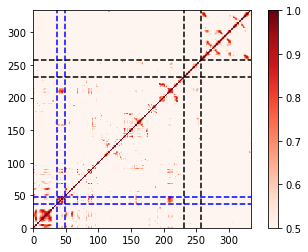

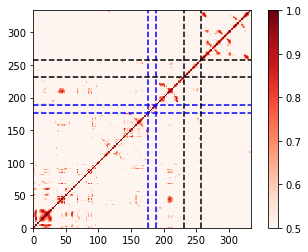

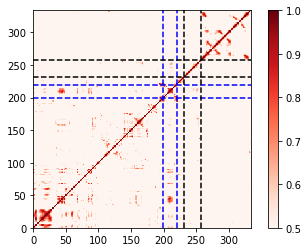

In [53]:
plot_matrix_with_lines(iris.data, "750loop",outdir,system)
plot_matrix_with_lines(iris.data, "uL4",outdir,system)
plot_matrix_with_lines(iris.data, "uL22",outdir,system)

In [54]:
system2="n13"
iris2 = np.loadtxt(F"../15Dec2022/{system2}_xcorr_sum.dat")
iris2.data.shape

(334, 334)

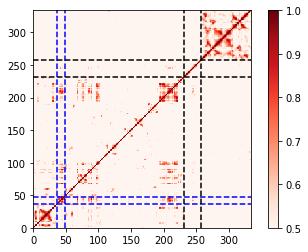

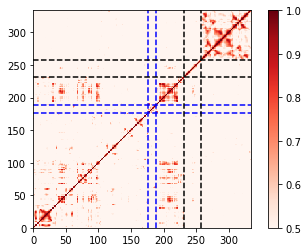

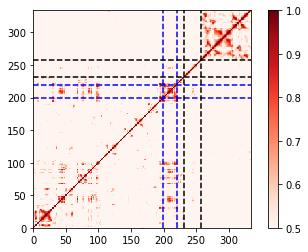

In [55]:
plot_matrix_with_lines(iris2.data, "750loop",outdir,system2)
plot_matrix_with_lines(iris2.data, "uL4",outdir,system2)
plot_matrix_with_lines(iris2.data, "uL22",outdir,system2)

In [56]:
system1="k13"
iris1 = np.loadtxt(F"../15Dec2022/{system1}_xcorr_sum.dat")
iris1.data.shape

(334, 334)

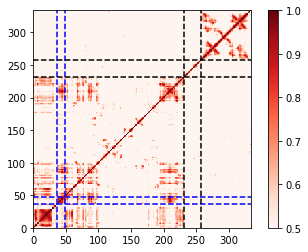

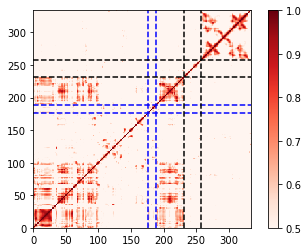

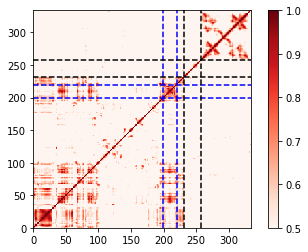

In [57]:
plot_matrix_with_lines(iris1.data, "750loop",outdir,system1)
plot_matrix_with_lines(iris1.data, "uL4",outdir,system1)
plot_matrix_with_lines(iris1.data, "uL22",outdir,system1)

In [58]:
system0="control"
iris0 = np.loadtxt(F"../15Dec2022/{system0}_xcorr_sum.dat")
iris0.data.shape

(334, 334)

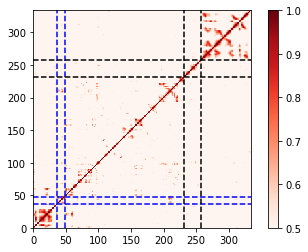

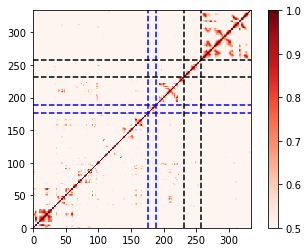

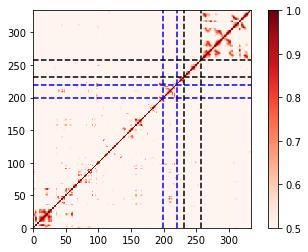

In [59]:
plot_matrix_with_lines(iris0.data, "750loop",outdir,system0)
plot_matrix_with_lines(iris0.data, "uL4",outdir,system0)
plot_matrix_with_lines(iris0.data, "uL22",outdir,system0)

In [62]:
iris3 = iris1-iris2 

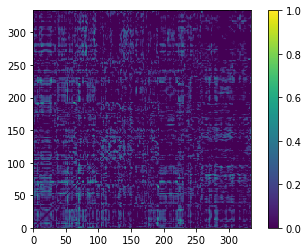

In [63]:
N = len(iris3.data)
plt.imshow(iris3.data, vmin=0, vmax=1)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [12]:
#betas=["{:.2f}".format(i) for i in iris[68]]

In [13]:
#with open(r'../01Dec2022/betas.txt', 'w') as fp:
#    for item in betas:
#        # write each item on a new line
#        fp.write("%s\n" % item)
#    print('Done')

In [120]:
def strip_heatmap(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={244:"G15",245:"S16",246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28",
            110:"2062",135:"2503",109:"2061",111:"2063",133:"2501",128:"2450",
            129:"2451",152:"2583",153:"2584",154:"2585",155:"2586",156:"2587",
            142:"2553"}
    
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    
    #print(datita)
    
    #datita=np.array([datita[0][199:221]]) #L22
    #datita=np.array([datita[0][176:190]]) #L4
    datita=np.array([datita[0][37:60]])

    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    plt.xlabel('Residue ID', weight='bold', fontsize=14)
    plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())

    plt.show()


In [15]:
def compare_strip_heatmap(atomnum, system):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}
    
    N = len(iris3[atomnum])

    datita=np.array(iris3[atomnum]).reshape(1,N)

    fig = plt.figure()

    fig.set_figheight(1)
    fig.set_figwidth(20)

    ax = plt.axes()
    
    norm = colors.Normalize(vmin=-1, vmax=1)
    
    #divnorm = colors.TwoSlopeNorm(vmin=-1., vcenter=0, vmax=1)
    
    plt.pcolormesh(datita, cmap='seismic',vmin=-1, vmax=1)
    plt.grid(False)
    plt.xlabel('Residue ID', weight='bold', fontsize=14)
    plt.title(F'K13-N13 {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())

    plt.show()


In [16]:
def strip_heatmap_lit_review(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    #datita=np.array([datita[0][199:221]]) #L22
    datita=np.array([[datita[0][44],datita[0][45],datita[0][46],datita[0][47],datita[0][48],
                     datita[0][106],datita[0][107],datita[0][109],datita[0][110],datita[0][129],
                     datita[0][130],datita[0][135],datita[0][136],datita[0][155],datita[0][169],
                     datita[0][211],datita[0][213]]]) #L4
    
    labels=['749','750','751','752','753','2058','2059','2061','2062','2451','2452','2503','2504','2586','2609','L91','L93']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.2,0), color='black', size="14", bbox=bbox)
     
        
    plt.xlabel('Residue ID', weight='bold', fontsize=14)
    plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    plt.show()

In [17]:
def strip_heatmap_lit_review_NEWVER(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28",
            110:"2062",135:"2503",109:"2061",111:"2063",133:"2501",128:"2450",
            129:"2451",152:"2583",153:"2584",154:"2585",155:"2586",156:"2587",
            142:"2553"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    #datita=np.array([datita[0][199:221]]) #L22
    datita=np.array([[datita[0][255],datita[0][110],datita[0][135],datita[0][109],datita[0][111],
                     datita[0][133],datita[0][128],datita[0][129],datita[0][152],datita[0][153],
                     datita[0][154],datita[0][155],datita[0][156],datita[0][142]]]) #L4
    
    labels=['R-3','2062','2503','2061','2063','2501','2450','2451','2583','2584','2585','2586','2587','2553']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.2,0), color='black', size="14", bbox=bbox)
     
        
    #plt.xlabel('Residue ID', weight='bold', fontsize=14)
    #plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    plt.show()

In [18]:
def strip_heatmap_lit_review_NEWVER_THRS(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28",
            110:"2062",135:"2503",109:"2061",111:"2063",133:"2501",128:"2450",
            129:"2451",152:"2583",153:"2584",154:"2585",155:"2586",156:"2587",
            142:"2553"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    #datita=np.array([datita[0][199:221]]) #L22
    
    for item in range(len(datita[0])):
        if datita[0][item] < 0.5:
            datita[0][item] = 0
            
        
    
    datita=np.array([[datita[0][255],datita[0][110],datita[0][135],datita[0][109],datita[0][111],
                     datita[0][133],datita[0][128],datita[0][129],datita[0][152],datita[0][153],
                     datita[0][154],datita[0][155],datita[0][156],datita[0][142]]]) #L4
    
    labels=['R-3','2062','2503','2061','2063','2501','2450','2451','2583','2584','2585','2586','2587','2553']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.2,0), color='black', size="14", bbox=bbox)
     
        
    #plt.xlabel('Residue ID', weight='bold', fontsize=14)
    #plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    plt.show()

In [19]:
def strip_heatmap_lit_review_NV_TNAC_THRS(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28",
            110:"2062",135:"2503",109:"2061",111:"2063",133:"2501",128:"2450",
            129:"2451",152:"2583",153:"2584",154:"2585",155:"2586",156:"2587",
            142:"2553", 106:"2058", 130:"2452",136:"2504",138:"2506",162:"2602",
            169:"2609",171:"2611"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    #datita=np.array([datita[0][199:221]]) #L22
    
    for item in range(len(datita[0])):
        if datita[0][item] < 0.5:
            datita[0][item] = 0
            
        
    
    datita=np.array([[datita[0][255],datita[0][106],datita[0][110],datita[0][130],datita[0][136],
                     datita[0][138],datita[0][153],datita[0][154],datita[0][155],datita[0][162],
                     datita[0][169],datita[0][171]]]) #L4
    
    labels=['R-3','2058','2062','2452','2504','2506','2584','2585','2586','2602','2609','2611']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.2,0), color='black', size="14", bbox=bbox)
     
        
    #plt.xlabel('Residue ID', weight='bold', fontsize=14)
    #plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    plt.show()

In [20]:
def strip_heatmap_lit_review_negpos(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    #datita=np.array([datita[0][199:221]]) #L22
    datita=np.array([[datita[0][44],datita[0][45],datita[0][46],datita[0][47],datita[0][48],
                     datita[0][106],datita[0][107],datita[0][109],datita[0][110],datita[0][129],
                     datita[0][130],datita[0][135],datita[0][136],datita[0][155],datita[0][169],
                     datita[0][211],datita[0][213]]]) #L4
    
    labels=['749','750','751','752','753','2058','2059','2061','2062','2451','2452','2503','2504','2586','2609','L91','L93']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='seismic', vmin=-1, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.2,0), color='black', size="14", bbox=bbox)
     
        
    plt.xlabel('Residue ID', weight='bold', fontsize=14)
    plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
   # print(datita)
    plt.show()

In [78]:
def strip_heatmap_L22(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={242:"G13",243:"S14",244:"G15",245:"S16",246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    datita=np.array([datita[0][199:221]]) #L22
    
    labels=['G79','P80','S81','M82','K83','R84','I85','M86','P87','R88','A89','K90','G91','R92','A93','D94','R95','I96','L97','K98','R99','T100']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.35,0), color='black', size="14", bbox=bbox, weight='bold')
    
    plt.tick_params(axis='x', bottom=False, labelbottom=False)
        
    #plt.xlabel('Residue ID', weight='bold', fontsize=14)
    #plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    
    plt.savefig(F'{outdir}/{atomnum}_{system}_uL22.png', transparent=True,dpi=300)

    plt.show()

In [70]:
def strip_heatmap_L22_THRS(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={242:"G13",243:"S14",244:"G15",245:"S16",246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    datita=np.array([datita[0][199:221]]) #L22
    
    for item in range(len(datita[0])):
        if datita[0][item] < 0.6:
            datita[0][item] = 0
    
    labels=['G79','P80','S81','M82','K83','R84','I85','M86','P87','R88','A89','K90','G91','R92','A93','D94','R95','I96','L97','K98','R99','T100']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.35,0), color='black', size="14", bbox=bbox, weight='bold')
    
    plt.tick_params(axis='x', bottom=False, labelbottom=False)
        
    plt.xlabel('Residue ID', weight='bold', fontsize=14)
    plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    
    plt.savefig(F'{outdir}/{atomnum}_{system}_uL22.png', transparent=True,dpi=300)
    
    plt.show()

In [23]:
def strip_heatmap_L4(atomnum, system, iris):
    
    #resname={63:"G21",62:"S20", 61:"G19", 60:"S18", 59:"G17",
    #         64:"H22",65:"A23", 66:"P24", 67:"I25", 68:"R26",69:"G27",70:"S28"}
    
    resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
             252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}
    
    
    N = len(iris[atomnum])

    datita=np.array(iris[atomnum]).reshape(1,N)
    #print(datita)
    #datita=np.absolute(datita)
    
    #print(datita)
    
    datita=np.array([datita[0][176:190]]) #L4
    
    labels=['K57','K58','P59','W60','R61','Q62','K63','G64','T65','G66','R67','A68','R69','S70']

    bbox=dict(boxstyle="round", alpha=0.7, color='w')
    
    fig = plt.figure()

    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax = plt.axes()

    plt.imshow(datita, cmap='Reds', vmin=0, vmax=1)
    plt.grid(False)
    for i in range(len(datita[0])):
        plt.annotate(labels[i],(i-0.2,0), color='black', size="12", bbox=bbox)
    
    plt.tick_params(axis='x', bottom=False, labelbottom=False)
        
    plt.xlabel('Residue ID', weight='bold', fontsize=14)
    plt.title(F'{system} - {resname[atomnum]}', weight='bold', fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    
    #COLORBAR
   # norm = mpl.colors.Normalize(vmin=0, vmax=1)
   # fig, ax = plt.subplots(figsize=(6, 1))
   # fig.subplots_adjust(bottom=0.5)

   # fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
   #              cax=ax, orientation='horizontal', label='Cross-Correlation')

    #END COLORBAR
    
    #print(datita)
    plt.show()

In [24]:
resname={246:"G17", 247:"S18",248:"G19",249:"S20",250:"G21",251:"H22",
         252:"A23",253:"P24",254:"I25",255:"R26",256:"G27",257:"S28"}

resi=257


In [25]:
# strip_heatmap_L4(resi,system0, iris0)
# strip_heatmap_L4(resi,system2, iris2)
# strip_heatmap_L4(resi,system, iris)
# strip_heatmap_L4(resi,system1, iris1)

In [26]:
# residuelist=[255,110,135,109,111,133,128,129,152,153,154,155,156,142]

# for resi in residuelist:
#     #strip_heatmap_lit_review_NEWVER(resi,system0, iris0)
#     #strip_heatmap_lit_review_NEWVER(resi,system, iris)
#     #strip_heatmap_lit_review_NEWVER(resi,system1, iris1)
#     #strip_heatmap_lit_review_NEWVER(resi,system2, iris2)
    
#     #strip_heatmap_lit_review_NEWVER_THRS(resi,system0, iris0)
#     #strip_heatmap_lit_review_NEWVER_THRS(resi,system, iris)
#     #strip_heatmap_lit_review_NEWVER_THRS(resi,system1, iris1)
#     strip_heatmap_lit_review_NEWVER_THRS(resi,system2, iris2)




In [27]:
# residuelist=[255,106,110,130,136,138,153,154,155,162,169,171]

# for resi in residuelist:
#     strip_heatmap_lit_review_NV_TNAC_THRS(resi,system0, iris0)
#     #strip_heatmap_lit_review_NV_TNAC_THRS(resi,system, iris)
#     #strip_heatmap_lit_review_NV_TNAC_THRS(resi,system1, iris1)
#     #strip_heatmap_lit_review_NV_TNAC_THRS(resi,system2, iris2)



In [28]:
# for resi in range(246,258):
#     strip_heatmap_lit_review_NEWVER(resi,system0, iris0)
#     #strip_heatmap_L4(resi,system2, iris2)
#     #strip_heatmap_L4(resi,system, iris)
#     #strip_heatmap_L4(resi,system1, iris1)

In [29]:
#for i in range(59,64):
#    strip_heatmap(i, system3)

In [30]:
#for i in range(59,64):
#    compare_strip_heatmap(i, system)

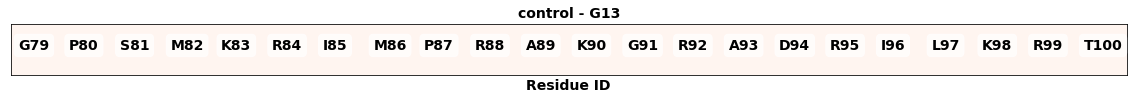

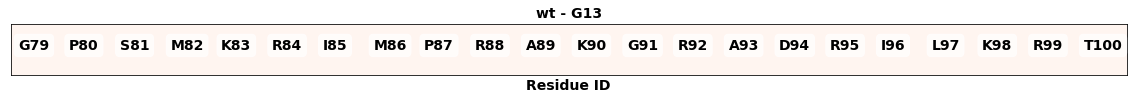

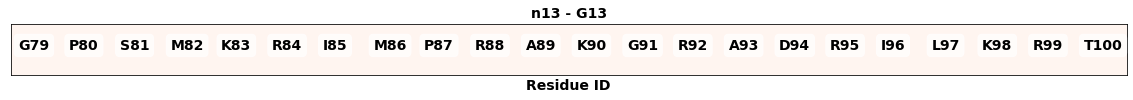

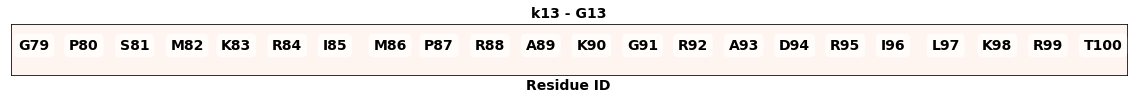

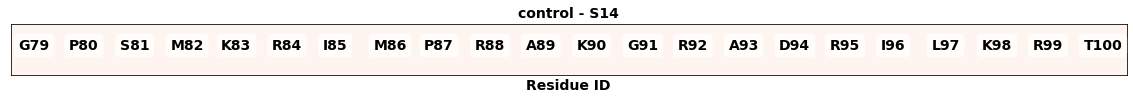

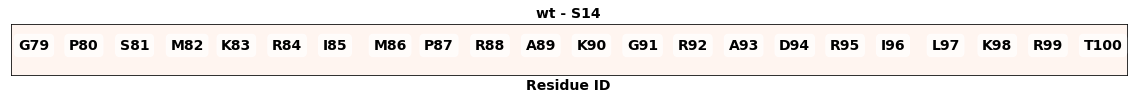

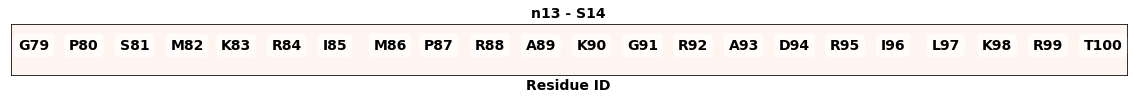

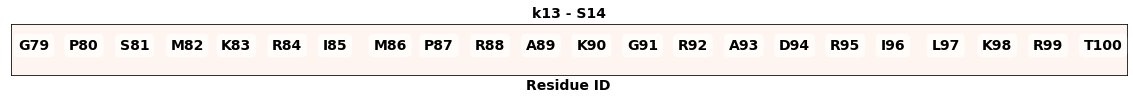

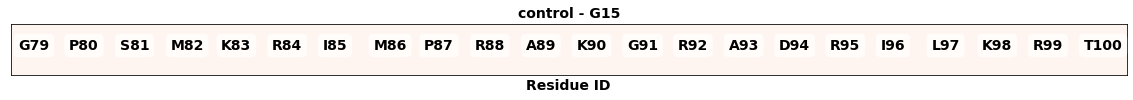

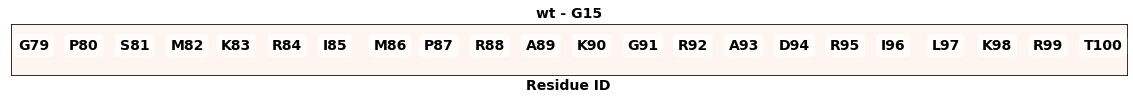

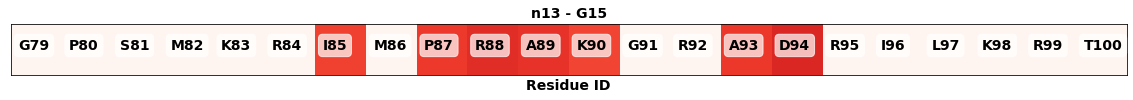

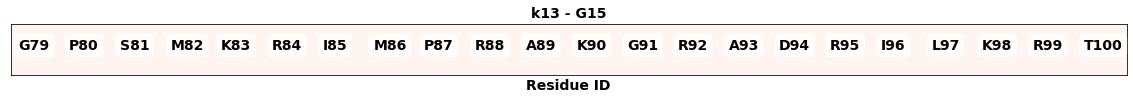

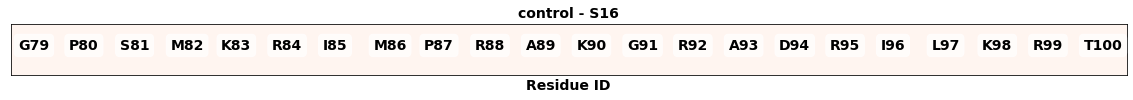

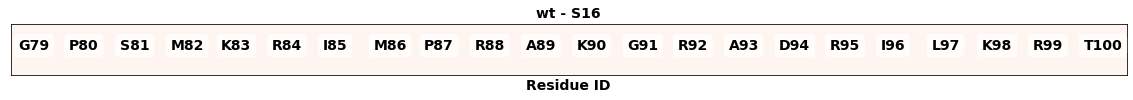

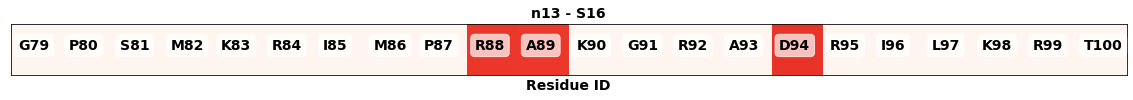

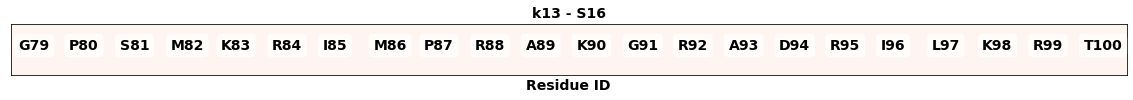

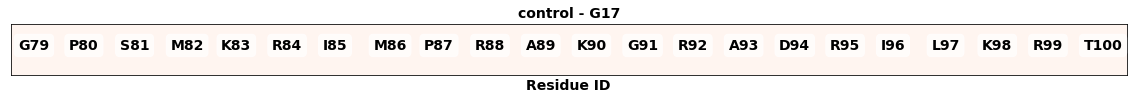

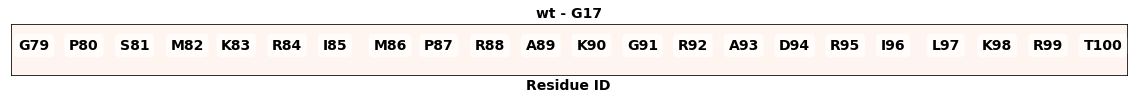

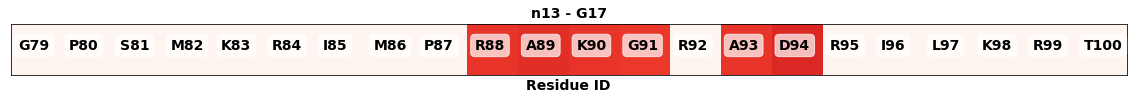

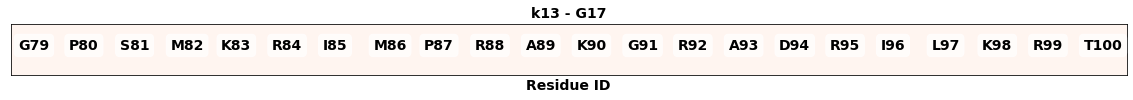

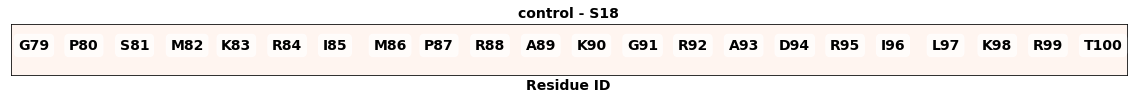

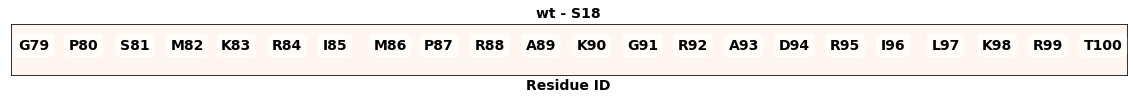

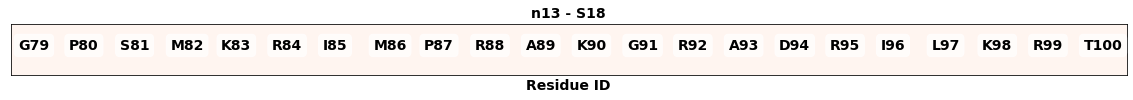

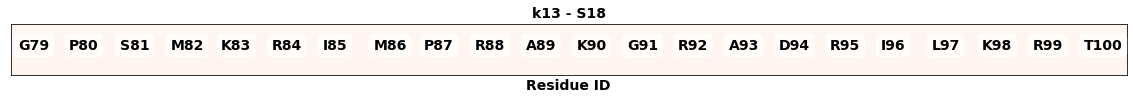

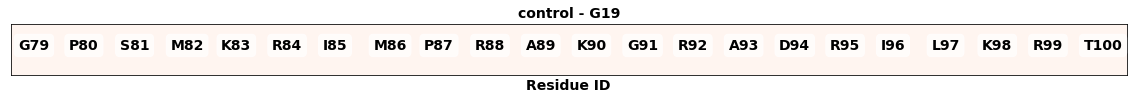

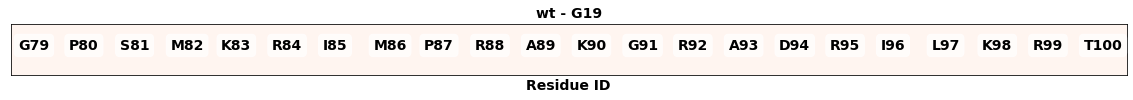

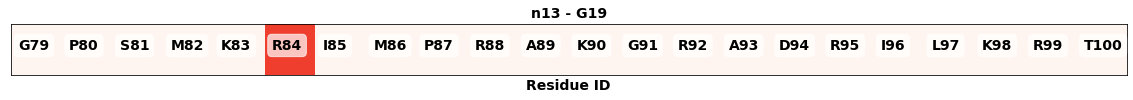

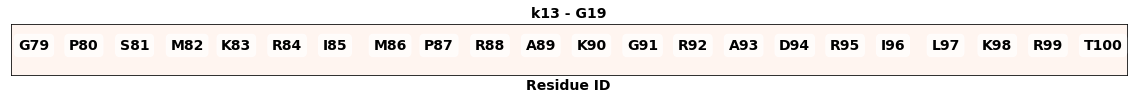

In [72]:
for resi in range(242,249):
    strip_heatmap_L22_THRS(resi,system0, iris0)
    strip_heatmap_L22_THRS(resi,system, iris)
    strip_heatmap_L22_THRS(resi,system2, iris2)
    strip_heatmap_L22_THRS(resi,system1, iris1)

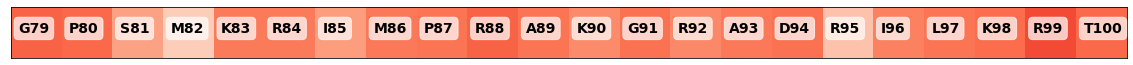

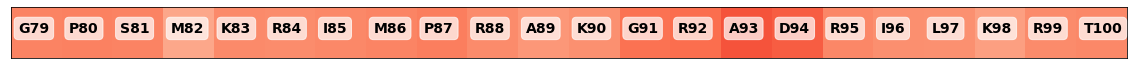

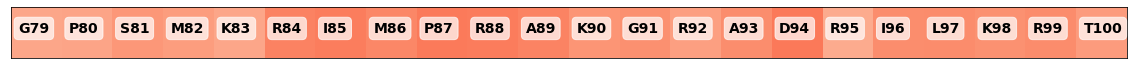

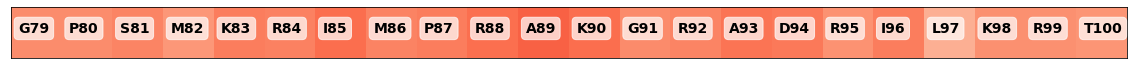

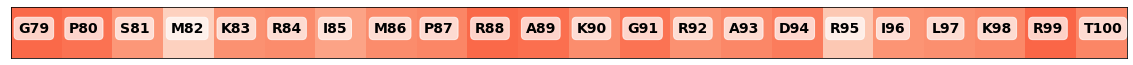

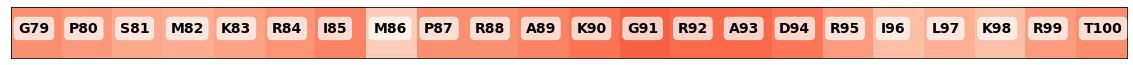

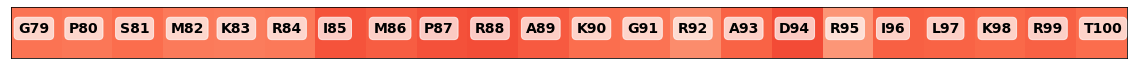

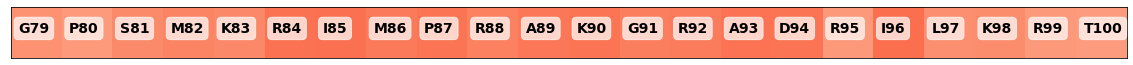

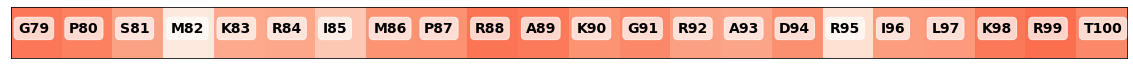

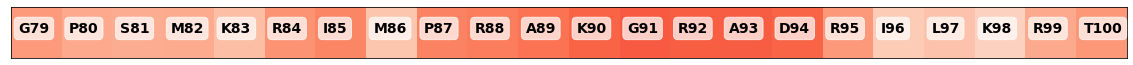

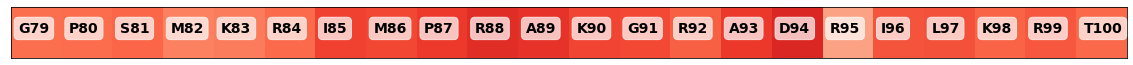

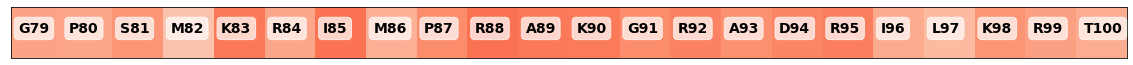

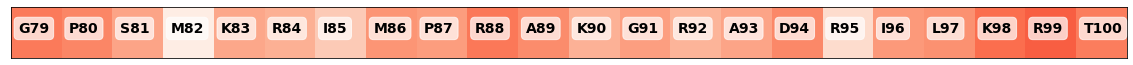

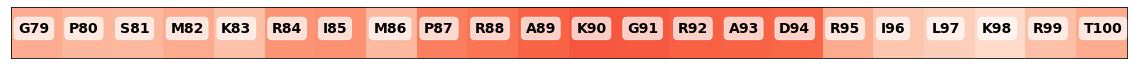

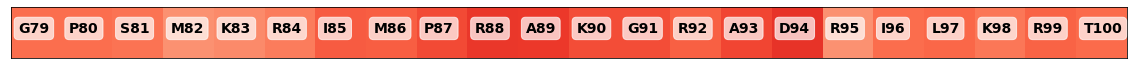

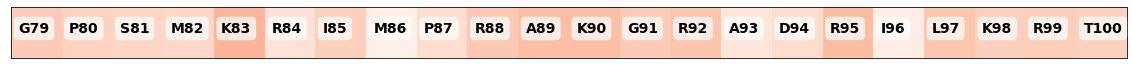

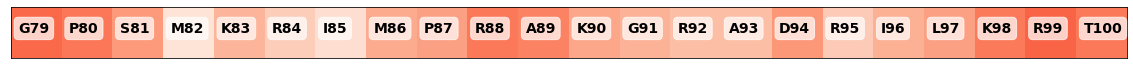

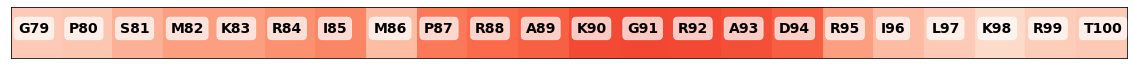

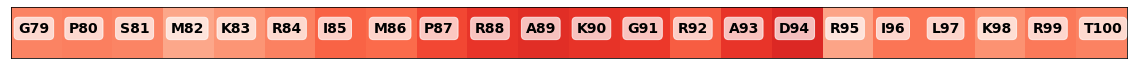

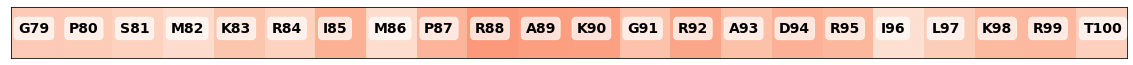

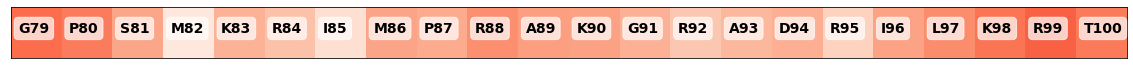

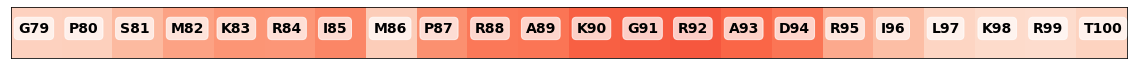

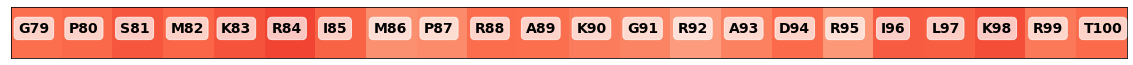

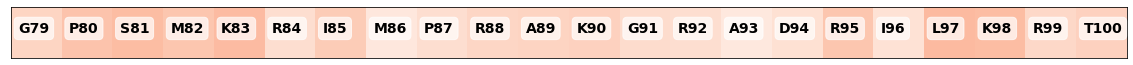

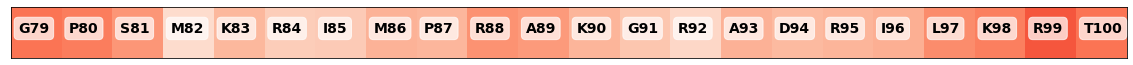

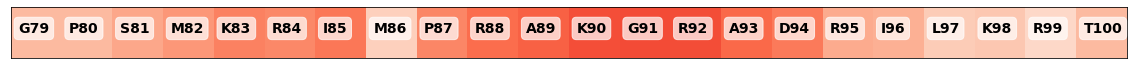

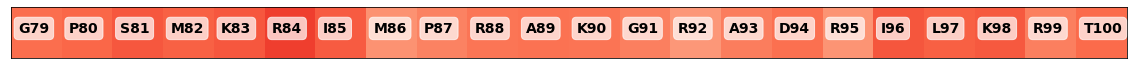

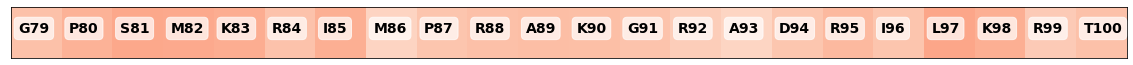

In [79]:
for resi in range(242,249):
    strip_heatmap_L22(resi,system0, iris0)
    strip_heatmap_L22(resi,system, iris)
    strip_heatmap_L22(resi,system2, iris2)
    strip_heatmap_L22(resi,system1, iris1)

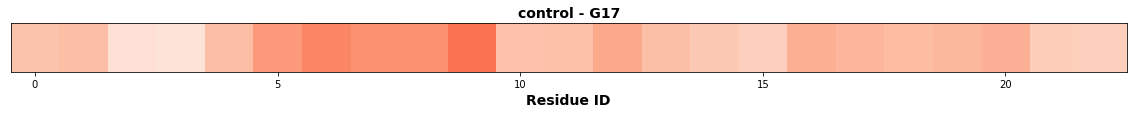

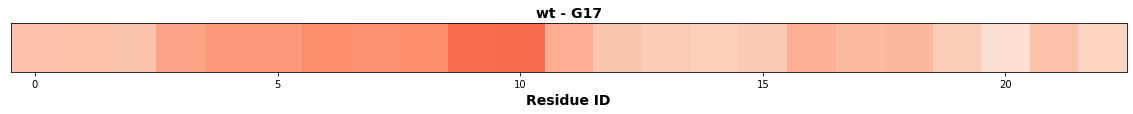

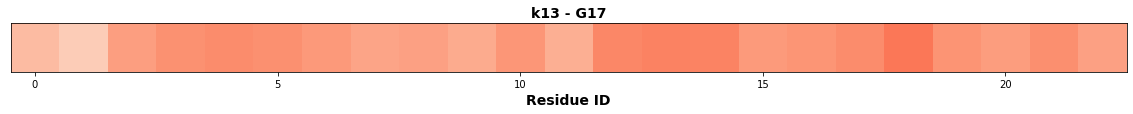

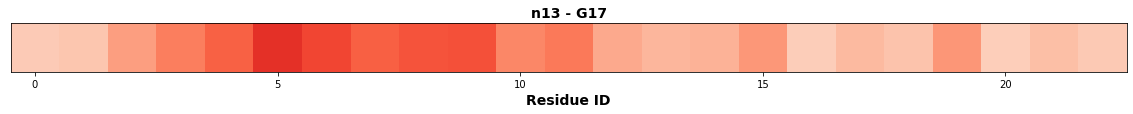

In [122]:
strip_heatmap(246, system0, iris0)
strip_heatmap(246, system, iris)
strip_heatmap(246, system1, iris1)
strip_heatmap(246, system2, iris2)

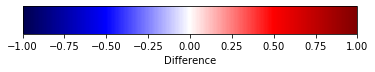

In [32]:
#cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='seismic'),
             cax=ax, orientation='horizontal', label='Difference')

In [33]:
#print(iris3[249])

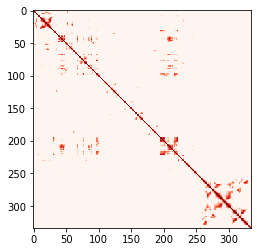

In [85]:
plt.imshow(iris2.data, cmap='Reds',vmin=0.6, vmax=1)

In [119]:
#datita=np.array(iris0[231:252]).reshape((252-231),N)
datita=np.array(iris0[231:252]).reshape((252-231),N
                                        
plt.imshow(datita, cmap='Reds',vmin=0.5, vmax=1)

ValueError: total size of new array must be unchanged

In [116]:
print(iris0.data[231:252])